## Importing the necessary libraries for our analysis.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#starting with loading the data into the program
data = pd.read_csv('train.csv')

In [3]:
#information on the features from the column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
#getting the first look at the data
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
#column names
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
#label encoding on the categorical columns
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
data['User_ID'] = le.fit_transform(data['User_ID'])
print("User_ID", le.classes_)
data['Product_ID'] = le.fit_transform(data['Product_ID'])
print("Product_ID", le.classes_)
data['Gender'] = le.fit_transform(data['Gender'])
print("Gender", le.classes_)
data['Age'] = le.fit_transform(data['Age'])
print("Age", le.classes_)
data['City_Category'] = le.fit_transform(data['City_Category'])
print("City_Category", le.classes_)

User_ID [1000001 1000002 1000003 ... 1006038 1006039 1006040]
Product_ID ['P00000142' 'P00000242' 'P00000342' ... 'P0099742' 'P0099842' 'P0099942']
Gender ['F' 'M']
Age ['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']
City_Category ['A' 'B' 'C']


In [ ]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
 #changing all the values for 4+ to 4 
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].replace('4+', '4')

In [ ]:
#changing the datatype from string to integer
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  int64  
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int64  
 6   Stay_In_Current_City_Years  550068 non-null  int64  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 50.4 MB


In [ ]:
#checking the null values in the data
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [ ]:
#since the data is large in size, dropping the null values 
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166821 entries, 1 to 545914
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     166821 non-null  int64  
 1   Product_ID                  166821 non-null  int64  
 2   Gender                      166821 non-null  int64  
 3   Age                         166821 non-null  int64  
 4   Occupation                  166821 non-null  int64  
 5   City_Category               166821 non-null  int64  
 6   Stay_In_Current_City_Years  166821 non-null  int64  
 7   Marital_Status              166821 non-null  int64  
 8   Product_Category_1          166821 non-null  int64  
 9   Product_Category_2          166821 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    166821 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 16.5 MB


In [ ]:
data.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,0,2376,0,0,10,0,2,0,1,6.0,14.0,15200
6,3,1745,1,4,7,1,2,1,1,8.0,17.0,19215
13,4,1355,1,2,20,0,1,1,1,2.0,5.0,15665
14,5,2203,0,5,9,0,1,0,5,8.0,14.0,5378
16,5,3598,0,5,9,0,1,0,2,3.0,4.0,13055
18,6,362,1,3,1,1,1,1,1,14.0,16.0,11788
19,7,2382,1,2,12,2,4,1,1,5.0,15.0,19614
24,7,2909,1,2,12,2,4,1,1,8.0,14.0,11927
28,8,765,1,2,17,2,0,0,5,8.0,14.0,5391
29,9,833,0,3,1,1,4,1,2,4.0,8.0,16352


In [ ]:
#getting the five points summary
data.describe()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000
mean,2956.922258,1471.491683,0.774645,2.455153,8.178886,1.087159,1.861690,0.402839,2.742766,6.896871,12.668243,11658.114980
std,1690.553079,942.668323,0.417817,1.335119,6.487522,0.759824,1.284791,0.490470,2.573969,4.500288,4.125338,5082.287959
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1478.000000,745.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,2.000000,9.000000,7869.000000
50%,3019.000000,1334.000000,1.000000,2.000000,7.000000,1.000000,2.000000,0.000000,1.000000,6.000000,14.000000,11756.000000
75%,4367.000000,2106.000000,1.000000,3.000000,14.000000,2.000000,3.000000,1.000000,4.000000,10.000000,16.000000,15626.000000
max,5890.000000,3630.000000,1.000000,6.000000,20.000000,2.000000,4.000000,1.000000,15.000000,16.000000,18.000000,23959.000000


In [ ]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

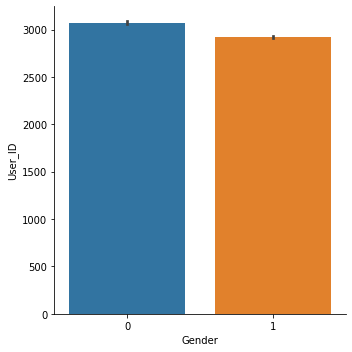

In [ ]:
#visualizations to understand the distribution of the various features
sns.catplot(data=data, x='Gender', y='User_ID', kind='bar')

### Amongst all the purshases made, majority of the purchases were made by Women/Female.

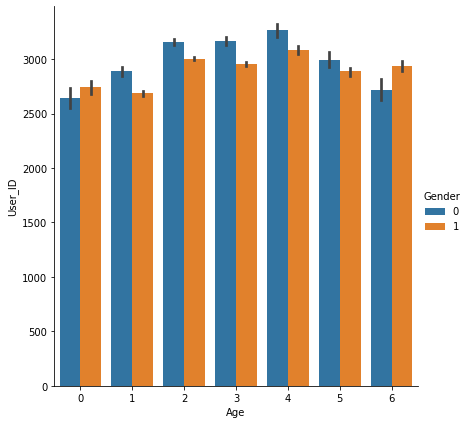

In [ ]:
sns.catplot(data=data, x='Age', y='User_ID', hue='Gender', kind='bar', height=6)

###Inferences from the Plot:
1. The most frequent purchases came from the females having user ids that belong to age category 4(36-45)
2. The least frequent purchases came from the males of the age category 1(18-25), and females of age category 0(0-17). 

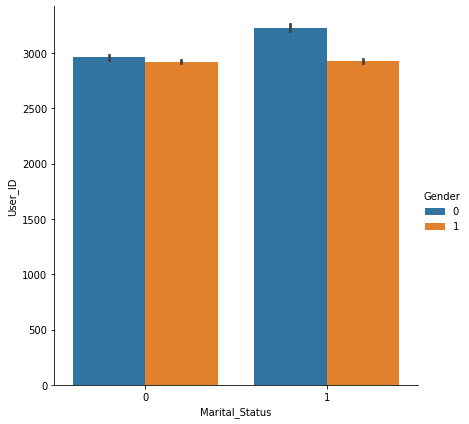

In [ ]:
sns.catplot(data=data, x='Marital_Status', y='User_ID', hue='Gender', kind='bar', height=6)

### the gender ratio in unmarried customers is almost similar, whereas the married customers have a sightly higher number of females in the lot. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


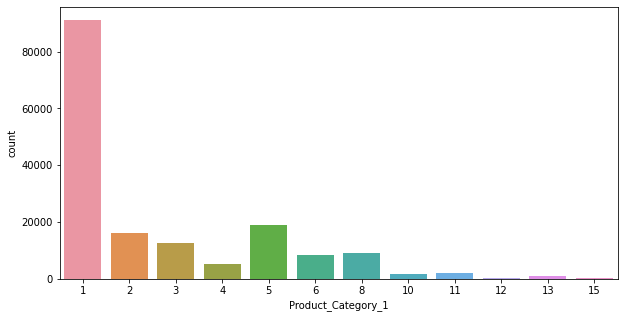

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data['Product_Category_1'])

### The product_category_1 sees a great rise of product category 1 and diminishes with the other products. The other considerable categories are 5, 2, 3, 6, 8, etc.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


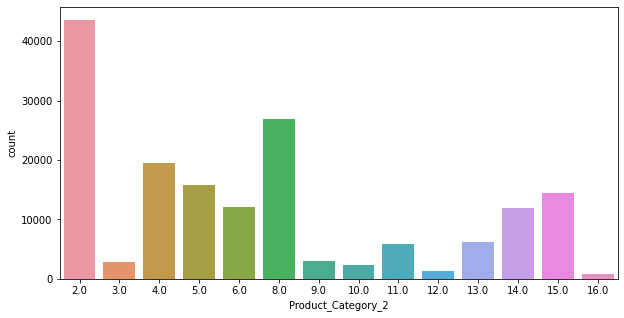

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data['Product_Category_2'])

### Product_Category_2 sees a considerate balance among categories. With category 2 topping the charts, and other considerable categories are 8, ,4,5,6,14,15,etc.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


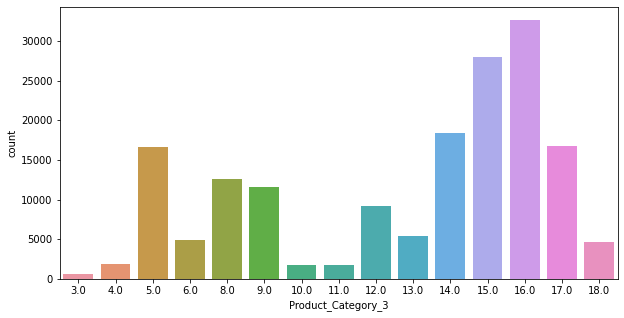

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data['Product_Category_3'])

### For product_category_3, the balance is towards the end with 16 topping the charts, and other considerable categories are 15, 14, 5, 8, 9, 17, etc.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


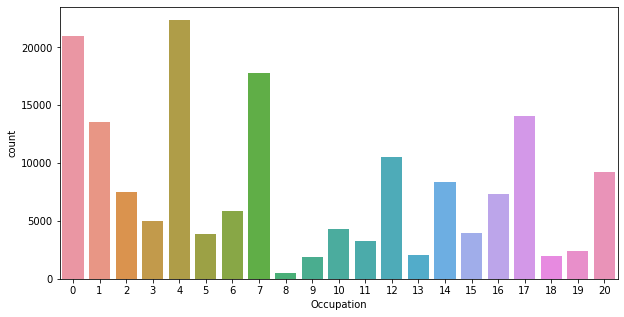

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data['Occupation'])

### occupation also sees a constant balance with 4 topping the chart, and other categories in the considerable amount with 0,1,2,7,12,17,20.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


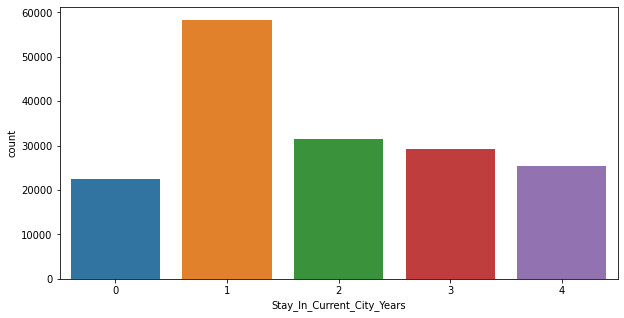

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data['Stay_In_Current_City_Years'])

### Majority of the customers have stayed a year in the city.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


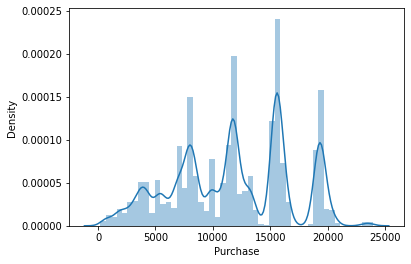

In [ ]:
sns.distplot(data['Purchase'])

### Purchases is not accumulated in a range, rather varies in different intervals. 

In [ ]:
#checking the correlation of the features
corr_spearman = data.corr()
corr_pearson = data.corr(method='pearson')
corr_kendall = data.corr(method='kendall')

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


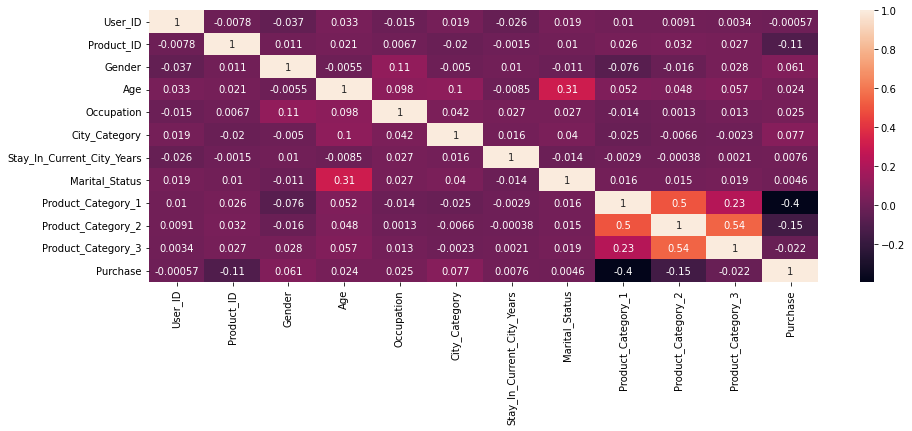

In [ ]:
#spearman correlation
plt.figure(figsize=(15,5))
sns.heatmap(corr_spearman, annot=True)

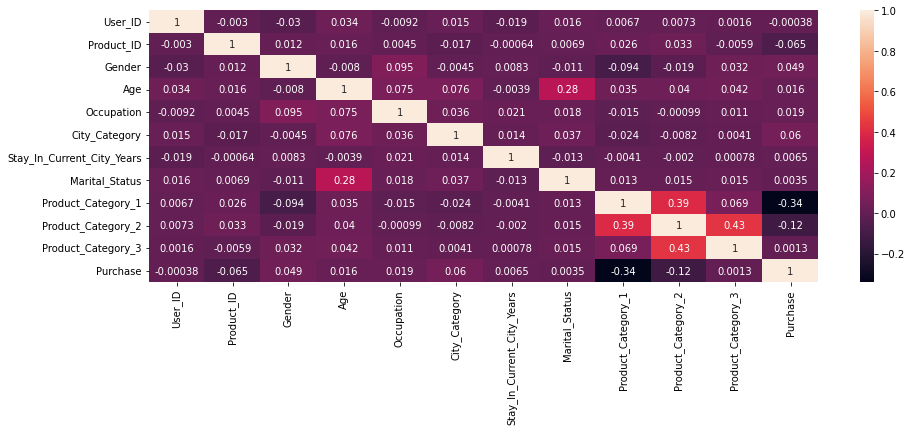

In [ ]:
#kendall correlation
plt.figure(figsize=(15,5))
sns.heatmap(corr_kendall, annot=True)

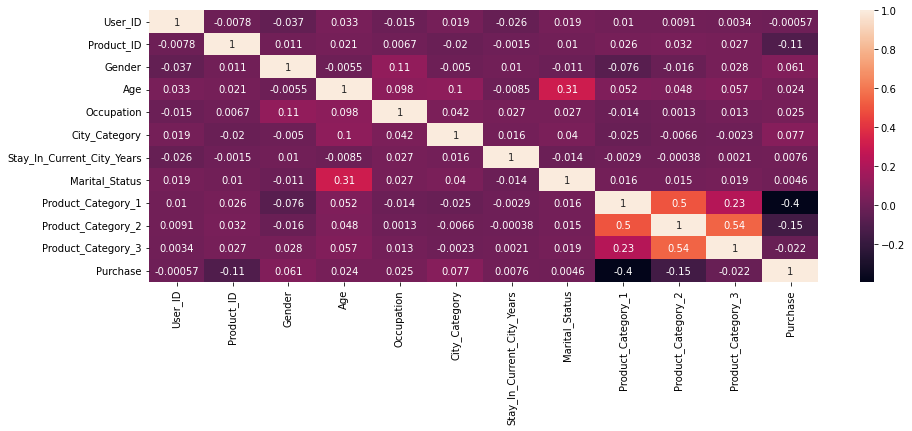

In [ ]:
#pearson correlation
plt.figure(figsize=(15,5))
sns.heatmap(corr_pearson, annot=True)

## Statistical Analysis 

### One Sample Test For Mean 
let's Suppose, it was observed that the average purchase made by the Men of the age 18-25 was 10000. Is it still the same? 

In [ ]:
#null hypothesis - The mean is 10000
#alternate hypothesis - The mean is not 10000

In [ ]:
new_data = data.loc[(data['Age'] == 1) & data['Gender'] == 1]

In [ ]:
new_data.shape

(24239, 12)

In [ ]:
sample_size = 1000
sample = new_data.sample(sample_size, random_state=0)

In [ ]:
pos_mean = 10000

In [ ]:
sample_mean = sample['Purchase'].mean()
print(sample_mean)

11806.467


In [ ]:
#one sample t-test
from scipy.stats import ttest_1samp

In [ ]:
t_stat, p_value = ttest_1samp(sample['Purchase'], pos_mean)
print(t_stat, p_value)

11.215158056527496 1.4097545140748883e-27


In [ ]:
#P-value is less than 0.05, reject the null hypothesis. 
#therefore, the mean purchase for men aged 18-25 is not 10000. 

### One Sample Test for Proportion
Let's Suppose, It was observed that the percentage of women of the age that spend more than 10000 was 35%. Is it still the same?

In [ ]:
#null hypothesis - proportion is 35%.
#alternate hypothesis - proportion is not 35%. 

data_new = data.loc[(data['Purchase'] > 10000)]

In [ ]:
data_new.shape

(102477, 12)

In [ ]:
#No of women in the sample
count = data_new['Gender'].value_counts()[0]

#number of observations
nobs = len(data_new['Gender'])

#hypothesised value
p0 = 0.35

In [ ]:
data_new['Gender'].value_counts()/nobs

1    0.793866
0    0.206134
Name: Gender, dtype: float64

In [ ]:
#one sample z test
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
z_stat, p_val = proportions_ztest(count=count, 
                                  nobs=nobs, 
                                  value=p0, 
                                  alternative="two-sided", 
                                  prop_var=False)
print(z_stat, p_val)

-113.84729816907917 0.0


In [ ]:
#p-value is less than 0.05, reject the null hypothesis. 
#the proportion of women spending more than 10000, is not 35%. 

### Two Sample test for Means
Is the average purchase made by men and women of the age 18-25 same?

In [ ]:
#null hypothesis - average spends are equal 
#alternate hypothesis - average spends are not equal

data_men = data.loc[(data['Gender'] == 1)& (data['Age'] == 1)]
data_women = data.loc[(data['Gender'] == 0) & (data['Age'] == 1)]

In [ ]:
#creating samples
data_men_sample = data_men.sample(500, random_state=0)
data_women_sample = data_women.sample(500, random_state=0)

In [ ]:
#checking variances of the two samples
print(data_men_sample.Purchase.var())
print(data_women_sample.Purchase.var())

25667399.361122247
25521524.106817637


In [ ]:
#sample means 
print(data_men_sample.Purchase.mean())
print(data_women_sample.Purchase.mean())

11767.16
10829.414


In [ ]:
#computing f statistic
from scipy.stats import f
F = data_men_sample.Purchase.mean()/data_women_sample.Purchase.mean()
print(F)

1.0865924970640146


In [ ]:
#calculating the degrees of freedom 
df1 = len(data_men_sample) - 1
df2 = len(data_women_sample) - 1

print(df1, df2)

499 499


In [ ]:
#p-value
import scipy
scipy.stats.f.cdf(F, df1, df2)

0.8230271634096517

In [ ]:
#the p-value is greater than 0.05, do not reject the null hypothesis. 
#the alternate hypothesis is true. The average purchases are same. 

In [ ]:
#two sample t-test for unequal variances
from scipy.stats import ttest_ind

t_stat_2, p_val_2 = ttest_ind(data_men_sample.Purchase, data_women_sample.Purchase, equal_var=False)
print(t_stat_2, p_val_2)

2.9307732867207004 0.0034582632769889553


In [ ]:
#we can reject the null hypothesis using the test statistic and since p-value is less than 0.05.
#the average purchases are not the same. 

### Two Sample test for Proportion
Is the percentage of men who have spend more than 10000 same for the ages 18-25 and 26-35

In [ ]:
#null hypothesis - Percentage of the men in the age groups is same
#alternate hypothesis - Percentage of the men in the age groups is not same

data_age1 = data.loc[(data['Age'] == 1) & (data['Purchase'] > 10000)]
data_age2 = data.loc[(data['Age'] == 2) & (data['Purchase'] > 10000)]

In [ ]:
data_age1_sample = data_age1.sample(1000, random_state=0)
data_age2_sample = data_age2.sample(1000, random_state=0)

In [ ]:
count = [(data_age1_sample['Gender'] == 1).sum(), (data_age2_sample['Gender'] == 1).sum()]

nobs = [(len(data_age1_sample)), len(data_age2_sample)]

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
stat_2sample, p_value_2sample = proportions_ztest(count=count, 
                                                  nobs=nobs, 
                                                  value=0, 
                                                  alternative='two-sided',
                                                  prop_var=False)

In [ ]:
print(stat_2sample, p_value_2sample)

-1.5165009817767297 0.12939272225896914


In [ ]:
#p value is more than 0.05, cannot reject the null hypthesis. 
#therefore, Percentage of the men in the age groups is same